# 1. 매개변수 갱신

- 최적화(optimization): 손실함수의 값을 가능한 한 낮추는 매개변수 찾기

5장까지 소개된 방법은 `확률적 경사 하강법(SGD)`을 이용한다.
그러나 `SGD`보다 효율적일 수 있는 방법들을 아래 더 소개한다.

## 1-1. 목적
SGD의 전략: `현재 위치`에서 가장 기울어진 방향으로 가기

## 1-2. 확률적 경사 하강법(SGD)
$$W<-W-\eta\frac{\partial L}{\partial W}$$
- W: 갱신할 가중치 매개변수
- $\frac{\partial L}{\partial W}$: W에 대한 손실 함수의 기울기
- $\eta$: learning rate

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr # learning rate

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

## 1-3. SGD의 단점
SGD는 `비등방성(anistropy)` 함수에서는 탐색 경로가 비효율적이다.
- 비등방성(anisotropy): 방향에 따라 물리적 성질이 바뀌는 것. 즉, 특정한 방향으로 보면 다른 성질이 있을 수 있다.
- 등방성: 어느 방향에서 보아도 같은 성질을 가지는 것.

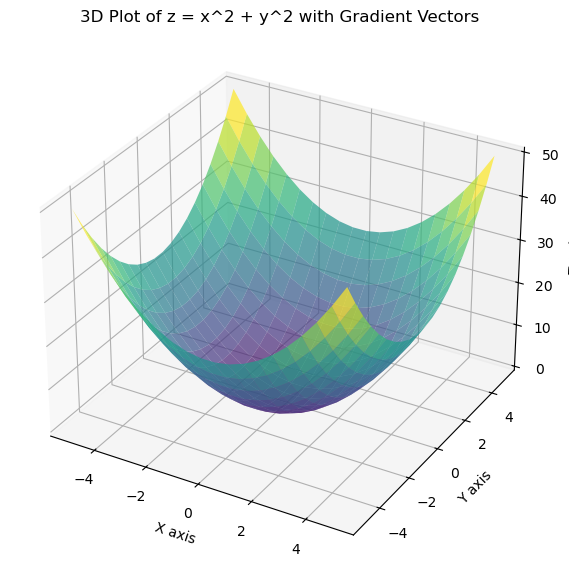

In [4]:
# 등방성
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# range of x, y
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# calc slope
dx,dy = np.gradient(Z)

# Graph
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Plot of z = x^2 + y^2 with Gradient Vectors')

plt.show()


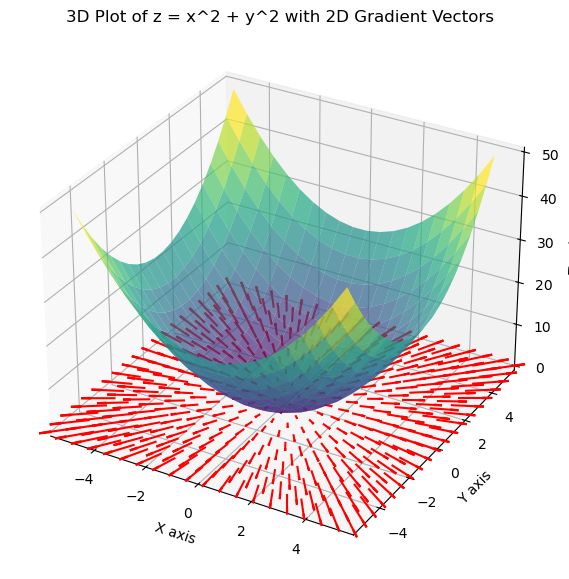

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# X, Y 축의 범위와 좌표 생성
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# 기울기 계산 (수식을 직접 사용)
dx = 2 * X
dy = 2 * Y

# 3차원 그래프 그리기
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')

# 2차원 화살표로 기울기 시각화 (z=0 평면에서 그리기)
ax.quiver(X, Y, 0, dx, dy, 0, color='red', length=0.1, normalize=False, arrow_length_ratio=0.3)

# 그래프 설정
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Plot of z = x^2 + y^2 with 2D Gradient Vectors')

plt.show()


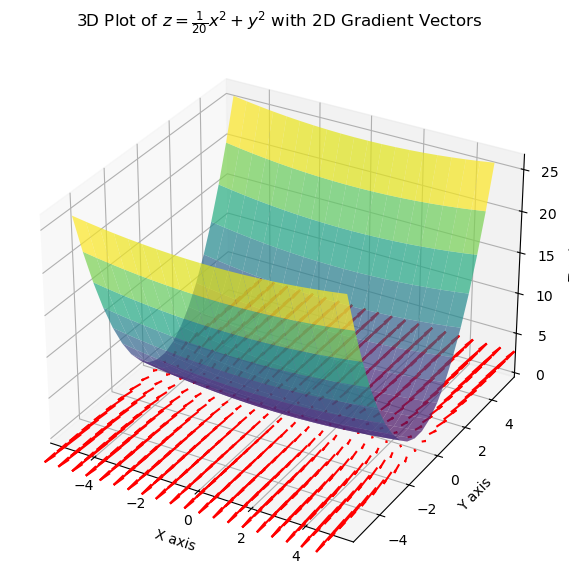

In [18]:
# 비등방성
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# X, Y 축의 범위와 좌표 생성
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)
Z = (1/20) * X**2 + Y**2

# 기울기 계산 (수식을 직접 사용)
dx = (1/10) * X  # x 방향 편미분
dy = 2 * Y       # y 방향 편미분

# 3차원 그래프 그리기
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')

# 2차원 화살표로 기울기 시각화 (z=0 평면에서 그리기)
ax.quiver(X, Y, 0, dx, dy, 0, color='red', length=0.2, normalize=False, arrow_length_ratio=0.3)

# 그래프 설정
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title(r'3D Plot of $z = \frac{1}{20}x^2 + y^2$ with 2D Gradient Vectors')

plt.show()


/tmp/ipykernel_4999/956824390.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


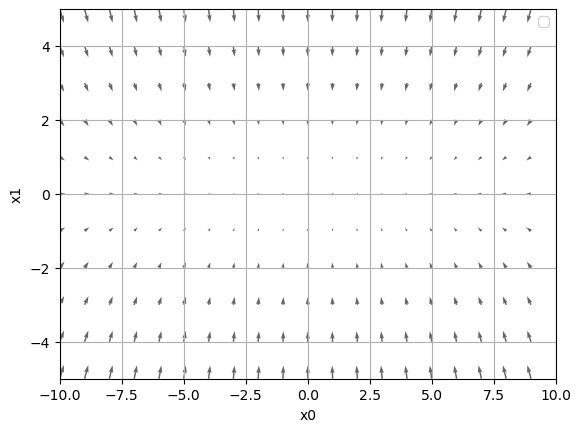

In [56]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad
    
# f(x, y) = (1/20) * x**2 + y**2 의 기울기
from mpl_toolkits.mplot3d import Axes3D

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)
     
x0 = np.arange(-10, 10, 1)
x1 = np.arange(-10, 10, 1)
X, Y = np.meshgrid(x0, x1)
    
X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([(1/(20**0.5))*X, Y]) )
    
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-10, 10])
plt.ylim([-5, 5])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

위 시각화 그래프에서 볼 수 있듯이 차이는
- 비등방성 함수는 특정 한 지점을 가리키지 않음
- y축 기울기는 큰데 x축은 완만하다(비등방적)

SGD가 위와 같은 비등방성 함수에서 비효율적으로 작동하는 것은  
SGD는 `기울기가 가리키는 방향`으로 `무조건` 이동하므로

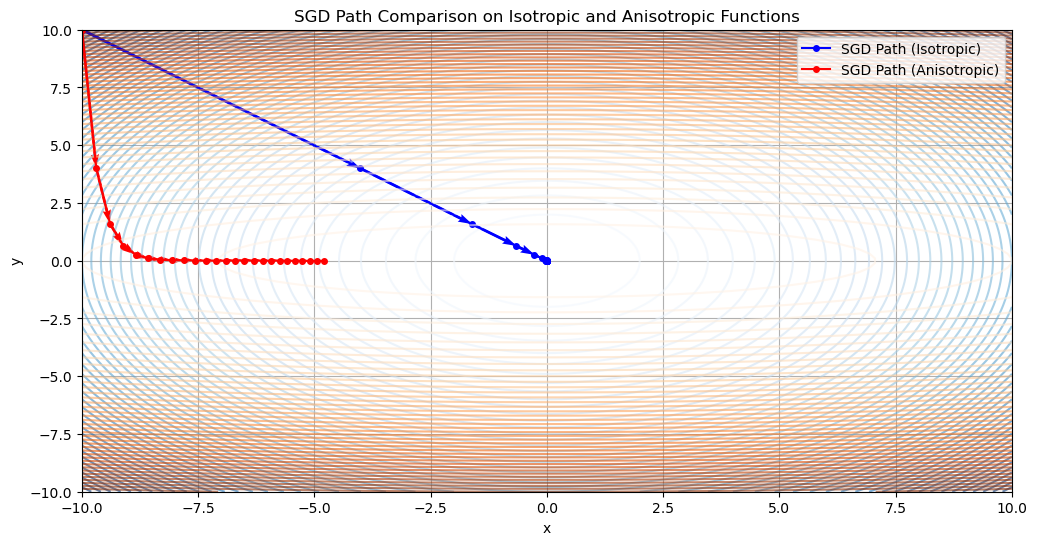

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# 등방성 함수와 그 기울기 정의
def isotropic_function(x, y):
    return x**2 + y**2

def isotropic_gradient(x, y):
    dx = 2 * x  # x 방향 편미분
    dy = 2 * y  # y 방향 편미분
    return dx, dy

# 비등방성 함수와 그 기울기 정의
def anisotropic_function(x, y):
    return (1/20) * x**2 + y**2

def anisotropic_gradient(x, y):
    dx = (1/10) * x  # x 방향 편미분
    dy = 2 * y       # y 방향 편미분
    return dx, dy

# SGD 경로 생성 함수
def sgd_path(function, gradient, start_x, start_y, learning_rate, steps, noise_level=0.05):
    x, y = start_x, start_y
    path_x, path_y, path_z = [x], [y], [function(x, y)]

    for _ in range(steps):
        dx, dy = gradient(x, y)
        # 작은 무작위 노이즈를 추가하여 지그재그 경로를 생성
        x -= learning_rate * (dx + np.random.normal(0, noise_level))
        y -= learning_rate * (dy + np.random.normal(0, noise_level))
        
        path_x.append(x)
        path_y.append(y)
        path_z.append(function(x, y))
    
    return path_x, path_y, path_z

# 시각화 설정
np.random.seed(0)
start_x, start_y = -10.0, 10.0  # 시작점
learning_rate = 0.3
steps = 24
noise_level = 0.02  # 노이즈 레벨을 낮춤

# 등방성 함수에서 SGD 경로 생성
iso_path_x, iso_path_y, iso_path_z = sgd_path(isotropic_function, isotropic_gradient, start_x, start_y, learning_rate, steps, noise_level)

# 비등방성 함수에서 SGD 경로 생성
anisotropic_path_x, anisotropic_path_y, anisotropic_path_z = sgd_path(anisotropic_function, anisotropic_gradient, start_x, start_y, learning_rate, steps, noise_level)

# 큰 범위 설정
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# 등방성 함수의 등고선
Z_iso = isotropic_function(X, Y)
plt.figure(figsize=(12, 6))
plt.contour(X, Y, Z_iso, levels=50, cmap='Blues', alpha=0.6)
plt.plot(iso_path_x, iso_path_y, 'bo-', markersize=4, label='SGD Path (Isotropic)')
plt.quiver(iso_path_x[:-1], iso_path_y[:-1], np.diff(iso_path_x), np.diff(iso_path_y), angles='xy', scale_units='xy', scale=1, color='blue', width=0.003)

# 비등방성 함수의 등고선
Z_aniso = anisotropic_function(X, Y)
plt.contour(X, Y, Z_aniso, levels=50, cmap='Oranges', alpha=0.6)
plt.plot(anisotropic_path_x, anisotropic_path_y, 'ro-', markersize=4, label='SGD Path (Anisotropic)')
plt.quiver(anisotropic_path_x[:-1], anisotropic_path_y[:-1], np.diff(anisotropic_path_x), np.diff(anisotropic_path_y), angles='xy', scale_units='xy', scale=1, color='red', width=0.003)

# 설정
plt.xlabel('x')
plt.ylabel('y')
plt.title('SGD Path Comparison on Isotropic and Anisotropic Functions')
plt.legend()
plt.grid(True)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()


교재에서는 경로가 심하게 지그재그로 이동하는 것을 보여주는데, 그것은 학습률을 극단적으로 높여야 해당 경로가 잘 보인다.   
위 상황에서는 같은 학습률과 스텝 수에서 등방성 함수는 빠르게 최적점에 도달했지만, 비등방성 함수에서는 그렇지 못함을 시각화한다.   
~~결론: 딴 거 쓰자~~

## 1-4. 모멘텀(Momentum)
### 물리학의 모멘텀(Momentum, 운동량)
- 외부에서 힘을 받지 않는 한 정지해 있거나 운동 상태를 지속하려는 성질.
- `관성`을 생각하면 됨.
 $$ {\displaystyle {\vec {F}}={\frac {\mathrm {d} }{\mathrm {d} t}}(m{\vec {v}})} $$
### 기계학습에서의 모멘텀
비유하자면 `관성`을 이용한 방법이다. SGD에서 계산된 기울기에 한 시점 전의 접선의 기울기값을 일정한 비율만큼 반영한다. 즉, 이전에 이동했던 방향과 기울기를 고려하여 어느정도 추가로 이동시키는 것.
$$v <- \alpha - \eta\frac{\partial L}{\partial W}$$
$$ W <- W + v$$

- W: 가중치 매개변수
- $\frac{\partial L}{\partial W}$: Loss function of W의 기울기
- $\eta$: Learning Rate
- v: velocity(속도)

### 장점
- 결과적으로 경로의 지그재그가 SGD보다 덜하다.
  - x축 기울기는 작고 y축은 크다.
  - 따라서 x축 힘은 작지만 방향이 변하지 않으므로 한 방향으로 가속한다.
  - y축은 크지만 방향이 변한다(지그재그) 관성에 의해 이 영향을 줄인다.
  - x축의 영향이 상대적으로 강해져, x축 방향으로 보다 빠르게 다가간다.
- 관성에 의해 Local minimum에서 멈추는 게 아니라 일부 이동하면서 Local minimum != Global minimum인 상황에서 Local minimum에서 탈출할 여지가 존재함.

In [52]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr # learning rate
        self.momentum = momentum
        self.v = None # velocity

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

## 1-5. AdaGrad
학습률의 적절한 선택은 중요한 문제다.
이 값이 작으면 학습이 너무 길어지고, 반대로 크면 발산해서 학습이 망한다.   ~~아까 시각화할때 지그재그를 보여주려고 했는데, 그러면 발산해서 0으로 제대로 가지 않는 이슈가 있었다~~   

따라서 학습률 관련한 최적화 방법으로 `학습률 감소(learning rate decay)`가 있는데, 학습을 진행하면서 학습률을 줄여가는 것이다.   

이에 사용할 수 있는 방법이 `AdaGrad`.   
parameter들은 각자 의미하는 바가 다른데 모든 parameter들에 동일한 학습률을 적용하는 것은 바람직하지 못한다. 따라서 각 parameter들에 서로 다른 학습률을 적용하는 학습률 감소로 보면 되겠다.

$$h <- h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W}$$
$$ W <- W- \eta\frac{1}{\sqrt{h}}\frac{\partial L}{\partial W}$$
- h: 기존 기울기 값을 제곱하여 계속 더해줌
- h가 학습률 조정에 쓰이게 되는데 $\frac{1}{\sqrt{h}}$로 반영이 되므로 많이 움직인 것이 학습률이 낮아진다는 수식적 의미임

In [48]:

class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

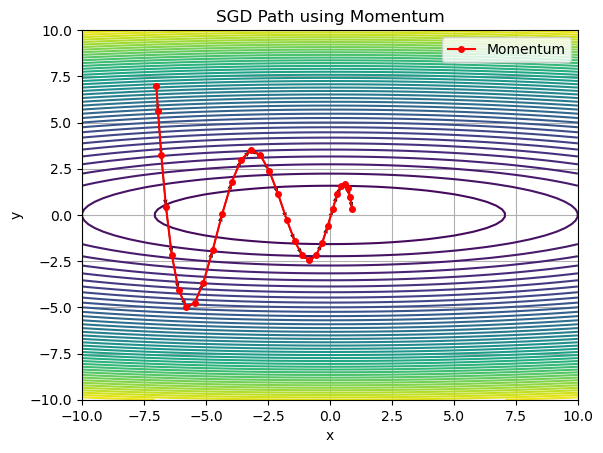

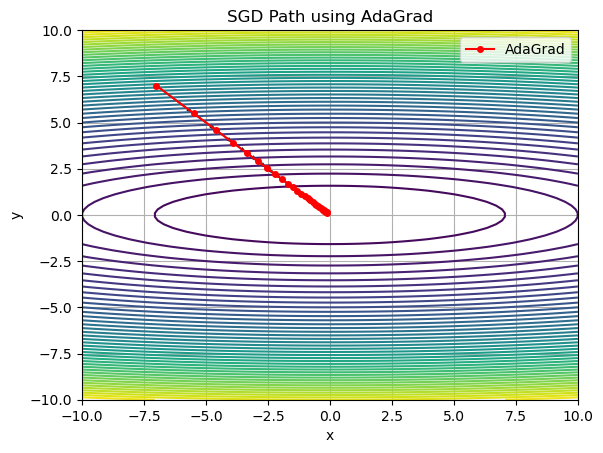

In [53]:
def function(x, y):
    return 0.05 * x**2 + y**2

def gradient(x, y):
    return 0.1 * x, 2 * y  # 기울기
    
def plot_optimization_path(optimizer, title):
    params = {'x': -7.0, 'y': 7.0}  # 초기 값
    path_x, path_y = [params['x']], [params['y']]

    for _ in range(30):
        grads = {}
        grads['x'], grads['y'] = gradient(params['x'], params['y'])
        optimizer.update(params, grads)
        
        path_x.append(params['x'])
        path_y.append(params['y'])

    # 등고선 그리기
    x_vals = np.linspace(-10, 10, 100)
    y_vals = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = function(X, Y)

    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    plt.plot(path_x, path_y, 'o-', color='red', markersize=4, label=title)
    plt.quiver(path_x[:-1], path_y[:-1], np.diff(path_x), np.diff(path_y), angles='xy', scale_units='xy', scale=1, color='black', width=0.003)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'SGD Path using {title}')
    plt.legend()
    plt.grid(True)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.show()

# 모멘텀과 AdaGrad로 최적화 경로 시각화
momentum_optimizer = Momentum(lr=0.1, momentum=0.9)
adagrad_optimizer = AdaGrad(lr=1.5)

plot_optimization_path(momentum_optimizer, "Momentum")
plot_optimization_path(adagrad_optimizer, "AdaGrad")


## 1-6. Adam
그냥 Momentum + AdaGrad

In [54]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)



## 1-7, 1-8. 선택 가이드
결과적으로는 하이퍼파라미터인 학습률, 레이어 개수에 따라 다 다르다.
그러나 일반적으로는 SGD보다 세 방법이 성능이 좋다.

# 2. 가중치의 초깃값
## 2-1. 0으로 초기화

`가중치 감소(weight decay)`: 가중치 매개변수의 값이 작아지도록 학습하는 것. -> 오버피팅 방지      
따라서 가중치를 작게 하기 위해 초깃값도 최대한 줄이자는 게 시작점이다.
그래서 극단적으로 0으로 초기화해버리면 어떻게 되는가?   
**결과적으로는 그러면 안된다!**   
그러면 오차역전파법에서 모든 가중치 값이 똑같이 갱신된다.   
예시) 2층 신경망   
- Layer1: 0
- Layer2: 0
- 두 입력층의 가중치가 0이므로 두번째 뉴런에 모두 같은 값 전달
따라서 이는 가중치를 여러 개 갖는 의미를 없어지게 하는 것

## 2-2. 은닉층의 활성화값 분포
가중치의 초기값에 따라 은닉층 활성화값들이 어떻게 변화하는지 실험할 수 있다.

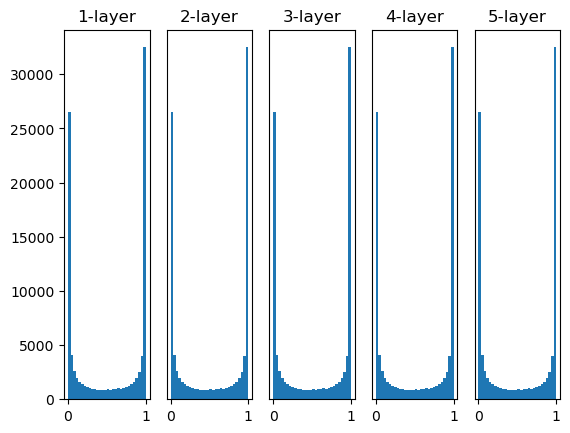

In [60]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w0 = np.random.randn(node_num, node_num) * 1
    w1 = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a0 = np.dot(x, w0)
    a1 = np.dot(x, w1)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a0 in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))

plt.show()

각 층의 활성화값들이 0과 1에 치우쳐있다.   
`기울기 소실(gradient vanishing)`: sigmoid함수가 출력이 0 또는 1에 가까워지면 derivative이 0에 다가간다. 따라서 역전파 기울기 값이 점점 작아지다 소실된다. 결과적으로 학습이 잘 되지 않을 것.

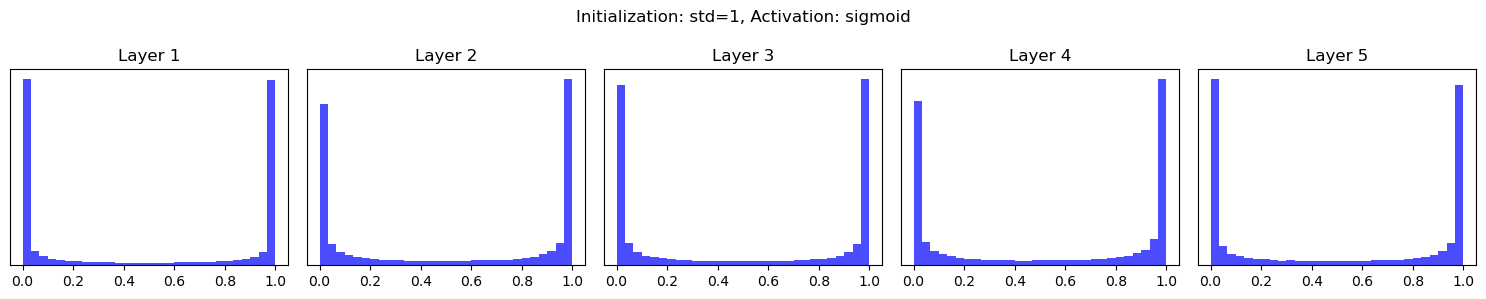

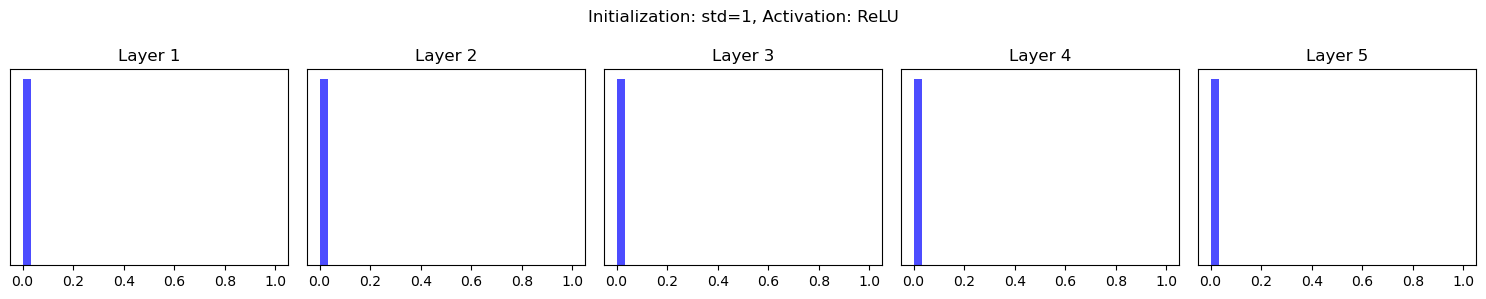

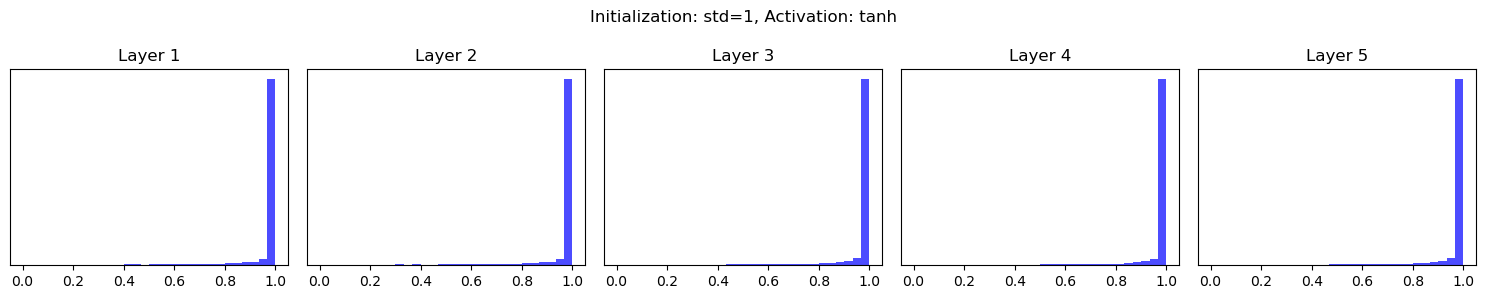

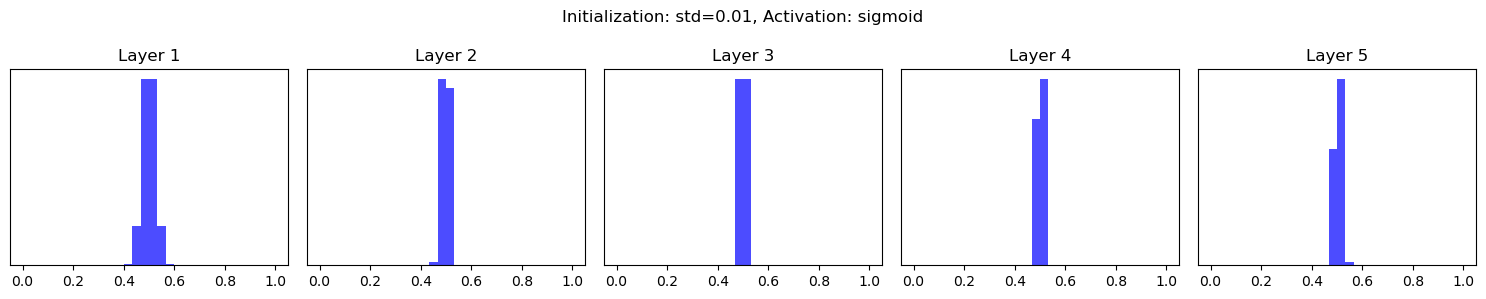

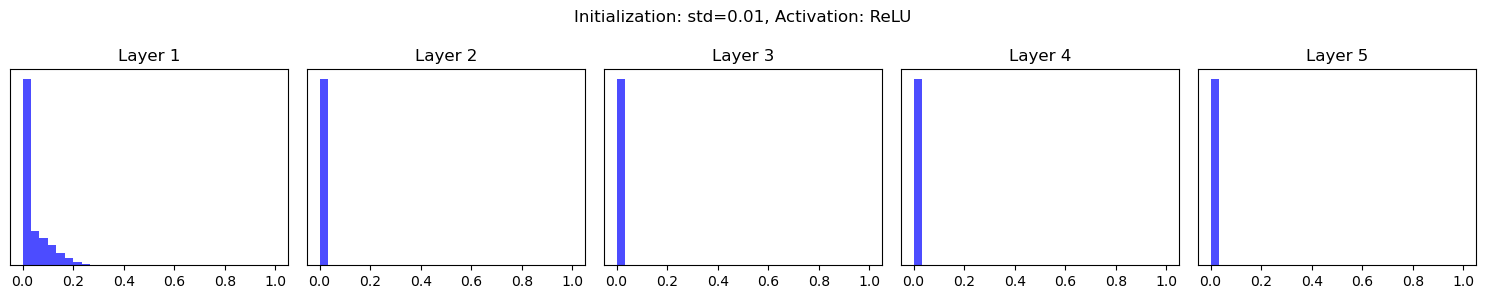

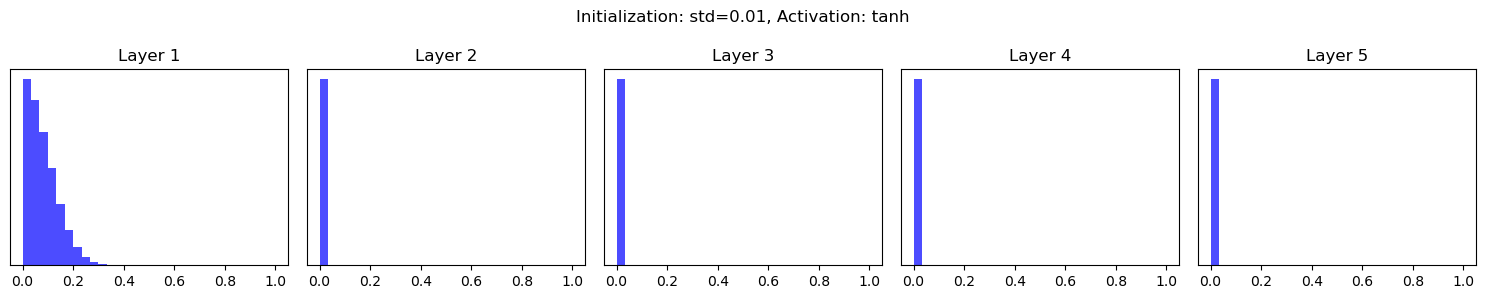

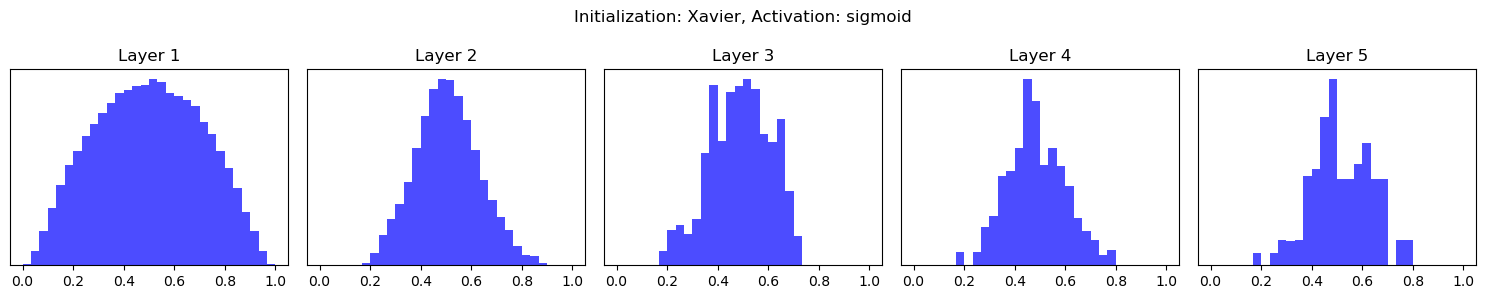

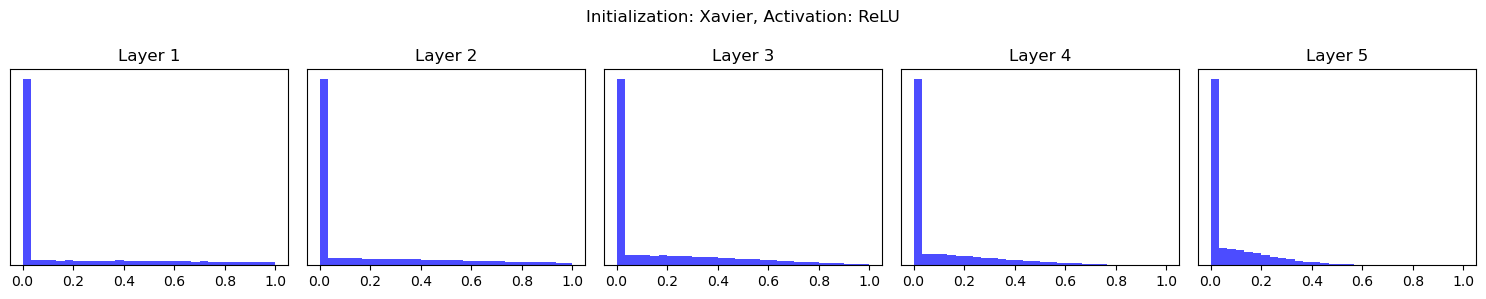

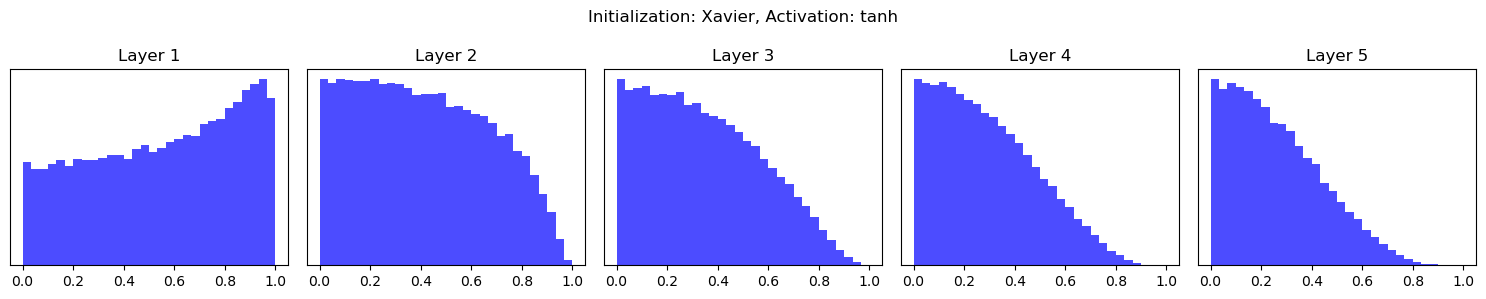

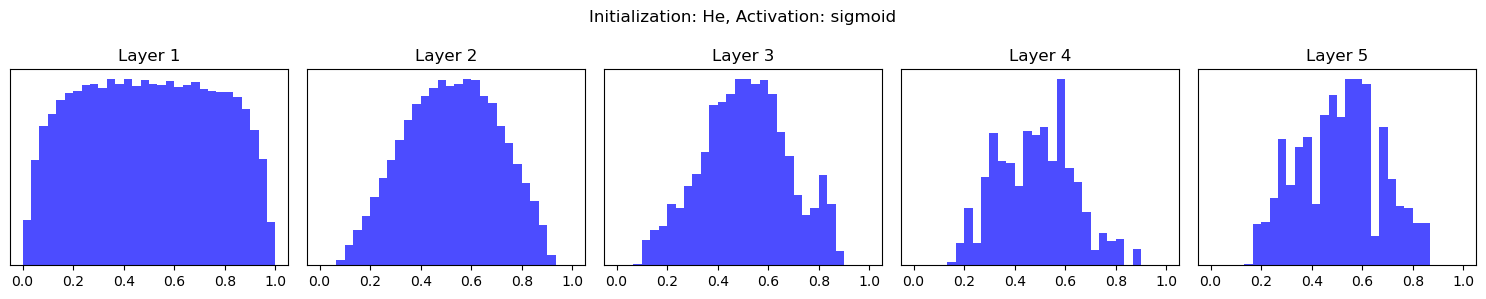

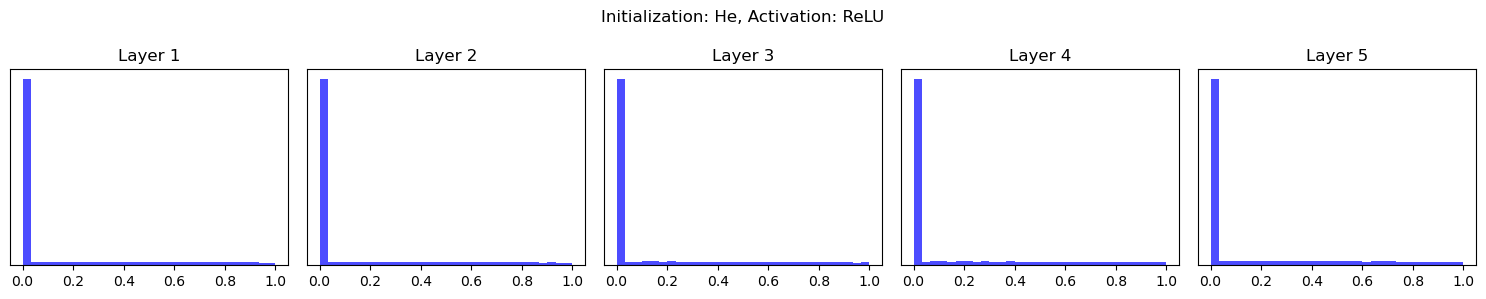

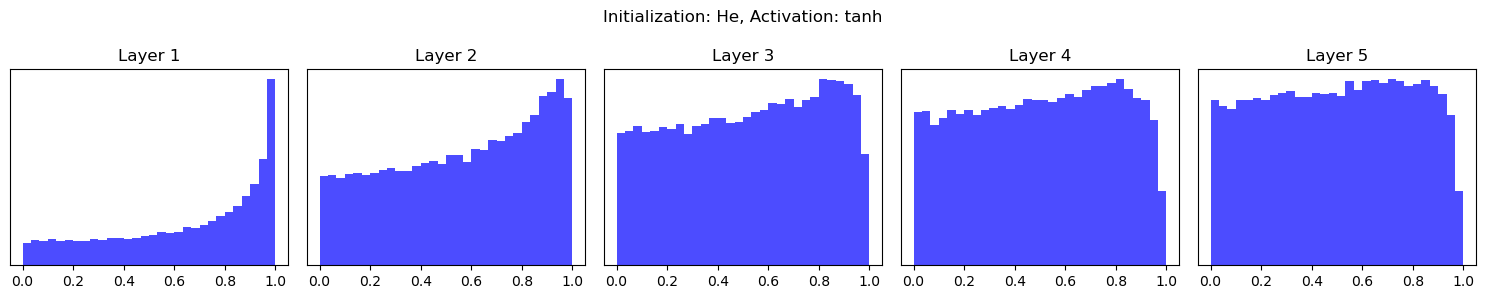

In [65]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

# 활성화 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# 설정
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개

# 실험할 초기화 방법과 활성화 함수 정의
initialization_methods = {
    "std=1": lambda: np.random.randn(node_num, node_num) * 1,
    "std=0.01": lambda: np.random.randn(node_num, node_num) * 0.01,
    "Xavier": lambda: np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num),
    "He": lambda: np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
}

activation_functions = {
    "sigmoid": sigmoid,
    "ReLU": ReLU,
    "tanh": tanh
}

# 각 초기화 및 활성화 함수 조합에 대해 레이어별 활성화 분포 시각화
for init_name, init_func in initialization_methods.items():
    for act_name, act_func in activation_functions.items():
        x = input_data
        activations = {}

        for i in range(hidden_layer_size):
            if i != 0:
                x = activations[i - 1]

            # 초기화와 활성화 함수 적용
            w = init_func()
            a = np.dot(x, w)
            z = act_func(a)

            activations[i] = z

        # 그래프 생성
        fig, axes = plt.subplots(1, hidden_layer_size, figsize=(15, 3))
        fig.suptitle(f"Initialization: {init_name}, Activation: {act_name}")

        # 각 레이어의 히스토그램 그리기
        for i in range(hidden_layer_size):
            ax = axes[i]
            ax.hist(activations[i].flatten(), bins=30, range=(0, 1), color='b', alpha=0.7)
            ax.set_title(f"Layer {i+1}")
            ax.set_yticks([])

        plt.tight_layout(rect=[0, 0, 1, 1])  # 제목을 위한 여백 조정
        plt.show()


~~각주 처리된 걸 하나하나 그리기 싫다는 강력한 의지의 코드~~   
   좀 바보같긴한데 그래프 설명이 아래에 있는 게 아니라 위에있음
정리하자면 초기 상태에서 다음과 같은 변화를 만들었다

### 가중치를 표준편차가 0.01인 정규분포로 초기화
std = 0.01인 부분을 보면 되는데 sigmoid 사용 시 0.5 부근에 집중되었다.   막말로 0과 1은 아니라서 기울기 소실은 없으나  다수의 뉴런이 거의 같은 값을 출력하는 것은 여전히 문제다.(`표현력 제한` 문제)

### Xavier 초깃값
Initialization: Xavier인 부분을 보면 되겠다.   
Xavier의 아이디어는 각 Layer의 활성화값을 광범위하게 분포시킬 목적으로 가중치의 적절한 분포를 찾자는 것.   
#### 수식적 이해
Xavier초기화는 각 층의 가중치를 mean = 0, variance = $\frac{1}{fan\_in}$ 인 정규분포를 따르도록 설정하는 방법.
- fan_in:해당 층으로 들어오는 노드 수
$$ W \sim N(0,\frac{1}{fan\_in})$$
다르게 표현하면 앞 계층의 노드가 n개면 표준편차가 $\frac{1}{\sqrt{n}}$ 인 분포.
층이 깊어지면 형태가 찌그러지긴 하지만 넓게 분포된다.

## 2-3. ReLU
`He 초깃값`: ReLU에 특화된 초깃값이라 할 수 있다.   
앞 계층의 노드가 n개일 때 표준편차가 $\sqrt{\frac{2}{n}$인 정규분포,
즉 아래와 같다.

$$ W \sim N(0, \frac{2}{fan\_in})$$

Xavier와 다른 것은 분자가 2가 되는 것뿐인데, 이를 쓰는 것은 ReLU는 음의 영역을 0으로 출력하므로 더 넓게 분포시키고자 그렇게 한다.   
-1 ~ +1이었던 것을 0 ~ 1로 표현하고자 하는 느낌   

해당 부분은 Initialization: He, Activation: ReLU를 보면 되겠다.   

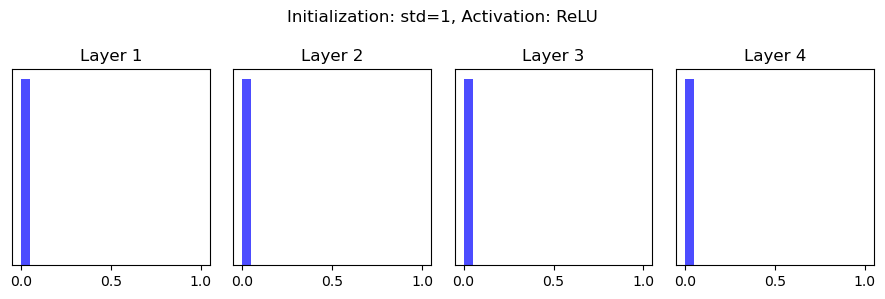

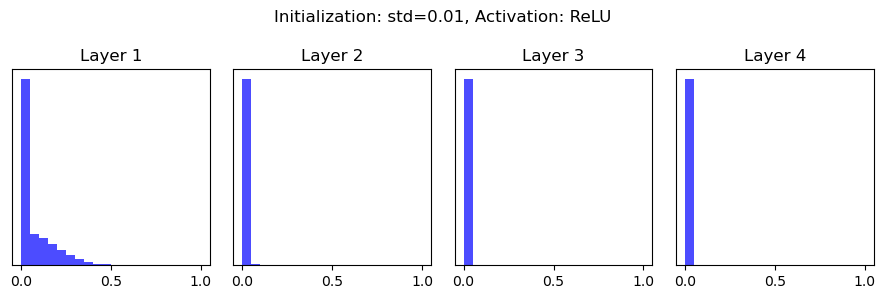

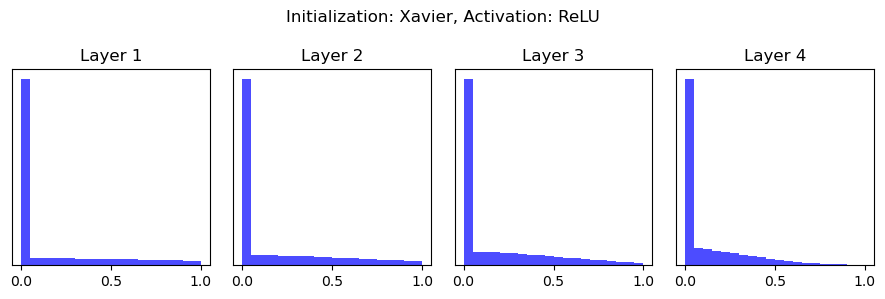

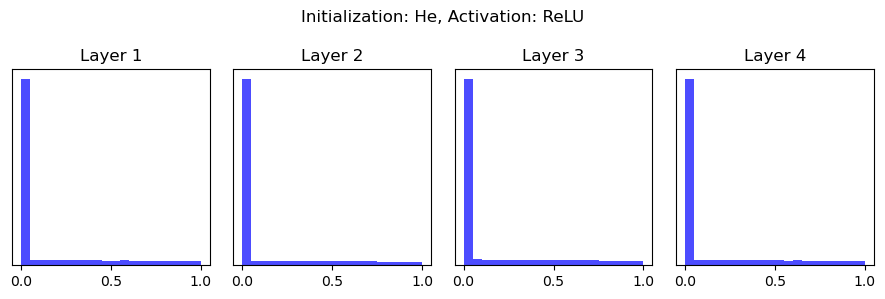

In [82]:
input_data = np.random.randn(1000, 300)  # 1000개의 데이터
node_num = 300  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 4  # 은닉층이 5개

activation_functions = {
    #"sigmoid": sigmoid,
    "ReLU": ReLU,
    #"tanh": tanh
}

for init_name, init_func in initialization_methods.items():
    for act_name, act_func in activation_functions.items():
        x = input_data
        activations = {}

        for i in range(hidden_layer_size):
            if i != 0:
                x = activations[i - 1]

            # 초기화와 활성화 함수 적용
            w = init_func()
            a = np.dot(x, w)
            z = act_func(a)

            activations[i] = z

        # 그래프 생성
        fig, axes = plt.subplots(1, hidden_layer_size, figsize=(9, 3))
        fig.suptitle(f"Initialization: {init_name}, Activation: {act_name}")

        # 각 레이어의 히스토그램 그리기
        for i in range(hidden_layer_size):
            ax = axes[i]
            ax.hist(activations[i].flatten(), bins=20, range=(0, 1), color='b', alpha=0.7)
            ax.set_title(f"Layer {i+1}")
            ax.set_yticks([])

        plt.tight_layout(rect=[0, 0, 1, 1])  # 제목을 위한 여백 조정
        plt.show()


ReLU에서는 He에서 가장 균일하게 분포된 결과.

# 3. 배치 정규화(Batch Normalization)
## 3-1. 배치 정규화 알고리즘
`배치 정규화`의 기본 아이디어는 각 층의 활성화값이 적당히 분포되도록 하는 것이다. 이의 장점은
- 학습 속도 개선
- 초기값 의존도 Down
- 오버피팅 억제
이는 수식적으로 다음과 같이 전개된다.

1. Calculate mean of Mini-batch
$$\mu_{B} = \frac{1}{m}\sum_{i=1}^{m}x_{i}$$
- m: size of mini-batch
   
2. Calculate variance of Mini-bach
$$\sigma_{B}^{2} = \frac{1}{m}\sum_{i=1}^{m}(x_{i}-\mu_{B})^2$$
3. Normalization

$$ \hat{x_{i}} = \frac{x_{i} - \mu_{B}}{\sqrt{\sigma_{B}^{2} + \epsilon}} $$

4. Scaling and Shifting
$$y_{i} = \gamma \hat{x_{i}} + \beta$$
- $\gamma, \beta$: 스케일과 쉬프트 파라미터
- $\gamma$가 확대를, $\beta$가 이동을 담당한다.

#### 전체 수식
$$y_{i} = \gamma \frac{x_{i} - \mu_{B}}{\sqrt{\sigma_{B}^{2} + \epsilon}} + \beta$$   
책에서는 3번과 4번 순서가 뒤집어져있지만 괜찮음

## 3-2. 배치 정규화의 효과
MNIST에서 적용하면 학습 속도가 빨라진다고 함.

============== 1/16 ==============
epoch:0 | 0.087 - 0.072
epoch:1 | 0.097 - 0.095
epoch:2 | 0.097 - 0.138
epoch:3 | 0.097 - 0.17
epoch:4 | 0.097 - 0.177
epoch:5 | 0.097 - 0.198
epoch:6 | 0.097 - 0.219
epoch:7 | 0.097 - 0.232
epoch:8 | 0.097 - 0.254
epoch:9 | 0.097 - 0.277
epoch:10 | 0.097 - 0.294
epoch:11 | 0.097 - 0.306
epoch:12 | 0.097 - 0.321
epoch:13 | 0.097 - 0.341
epoch:14 | 0.097 - 0.355
epoch:15 | 0.097 - 0.364
epoch:16 | 0.097 - 0.375
epoch:17 | 0.097 - 0.39
epoch:18 | 0.097 - 0.396
epoch:19 | 0.097 - 0.418
============== 2/16 ==============
epoch:0 | 0.105 - 0.103
epoch:1 | 0.097 - 0.115


/tmp/ipykernel_41605/210842202.py:95: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


epoch:2 | 0.097 - 0.128
epoch:3 | 0.097 - 0.143
epoch:4 | 0.097 - 0.152
epoch:5 | 0.097 - 0.173
epoch:6 | 0.097 - 0.185
epoch:7 | 0.097 - 0.215
epoch:8 | 0.097 - 0.235
epoch:9 | 0.097 - 0.264
epoch:10 | 0.097 - 0.295
epoch:11 | 0.097 - 0.322
epoch:12 | 0.097 - 0.343
epoch:13 | 0.097 - 0.384
epoch:14 | 0.097 - 0.403
epoch:15 | 0.097 - 0.425
epoch:16 | 0.097 - 0.437
epoch:17 | 0.097 - 0.465
epoch:18 | 0.097 - 0.478
epoch:19 | 0.097 - 0.496
============== 3/16 ==============
epoch:0 | 0.134 - 0.146
epoch:1 | 0.299 - 0.149
epoch:2 | 0.41 - 0.164
epoch:3 | 0.495 - 0.192
epoch:4 | 0.584 - 0.218
epoch:5 | 0.666 - 0.247
epoch:6 | 0.702 - 0.285
epoch:7 | 0.769 - 0.326
epoch:8 | 0.782 - 0.363
epoch:9 | 0.823 - 0.397
epoch:10 | 0.857 - 0.427
epoch:11 | 0.875 - 0.46
epoch:12 | 0.898 - 0.486
epoch:13 | 0.911 - 0.513
epoch:14 | 0.92 - 0.536
epoch:15 | 0.934 - 0.558
epoch:16 | 0.944 - 0.583
epoch:17 | 0.947 - 0.597
epoch:18 | 0.953 - 0.612
epoch:19 | 0.959 - 0.62
============== 4/16 ==============
ep

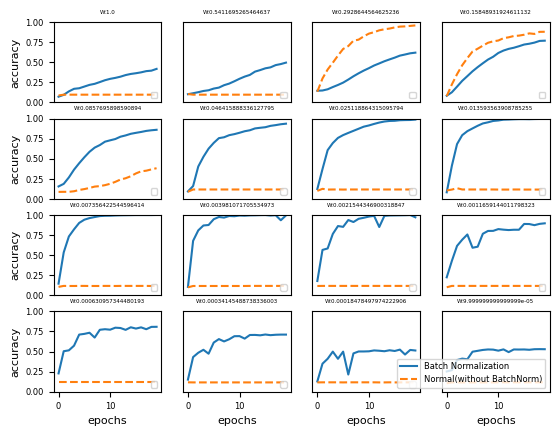

In [9]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)# 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
sys.path.append(os.path.abspath("../common"))
from multi_layer_net_extend import MultiLayerNetExtend
from optimizer import SGD, Adam

plt.rcParams.update({
    'font.size': 8,            # 기본 폰트 크기
    'axes.titlesize': 4,       # 제목 크기
    'axes.labelsize': 8,       # 축 레이블 크기
    'xtick.labelsize': 6,      # x축 눈금 크기
    'ytick.labelsize': 6,      # y축 눈금 크기
    'legend.fontsize': 6       # 범례 폰트 크기
})

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

거의 모든 경우에서 배치 정규화를 사용할 때 학습 진도가 빠른 것으로 나타난다.

# 4. 바른 학습을 위해
## 4-1. 오버피팅
`오버피팅`: 신경망이 훈련 데이터에만 지나치게 적응되어 그 외에는 성능이 떨어지는 형태.   
다음 두 경우에 주로 발생:   
- 매개변수가 많고 표현력이 높음
- 훈련 데이터가 적음
아래 코드는 일부러 오버피팅을 일으키는 것의 예시다.

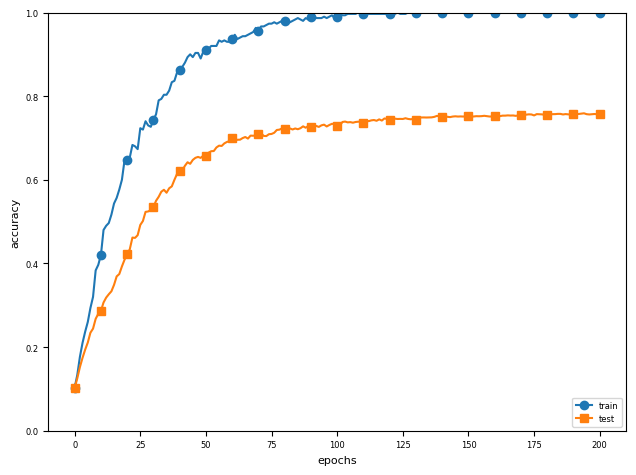

In [13]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
sys.path.append(os.path.abspath("../common"))
from multi_layer_net import MultiLayerNet
from optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        #print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

위의 코드에서 100에폭 시점부터 훈련 데이터는 거의 1에 가까운 정확도를 보이지만 test는 그러지 못하고 있다. 오버피팅이 일어나서 그렇다.

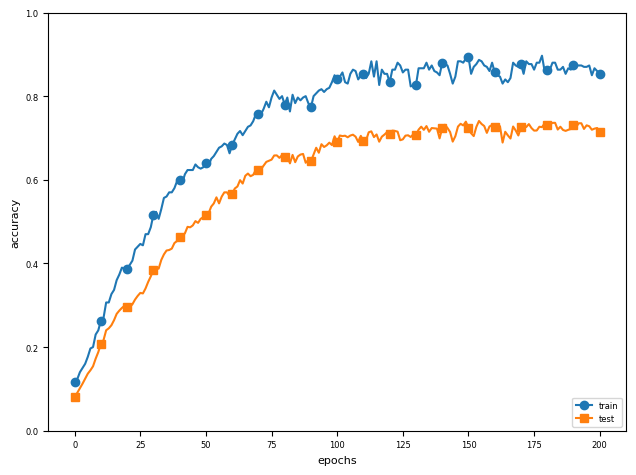

In [14]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
sys.path.append(os.path.abspath("../common"))
from multi_layer_net import MultiLayerNet
from optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        #print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## 4-2. 가중치 감소
위의 코드에서는 그러한 현상이 좀 완화된 것이 보인다.  
오버피팅 억제용으로 `가중치 감소`를 사용할 수 있다.   
큰 가중치에 큰 패널티를 부여하는 것(~~큰 힘에는 큰 책임이 따른다~~)   

```python
# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10, weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신
```
$\lambda = 0.1$로 가중치 감소를 적용하여 실행하면 오버피팅이 억제되었고, train data에서도 정확도가 1에 도달하지 못했다.

## 4-3. 드롭아웃
오버피팅을 억제하는 방법으로 `가중치 감소`를 사용했으나 신경망 모델이 복잡해지면 이것으로는 충분치 않다.   
`드롭아웃`: 뉴런을 임의로 삭제하면서 학습하는 방법   
을 이용할 수 있다.   
뉴런을 무작위로 삭제하여 신호 전달을 차단함으로써 아래 그림과 같은 형태가 된다.

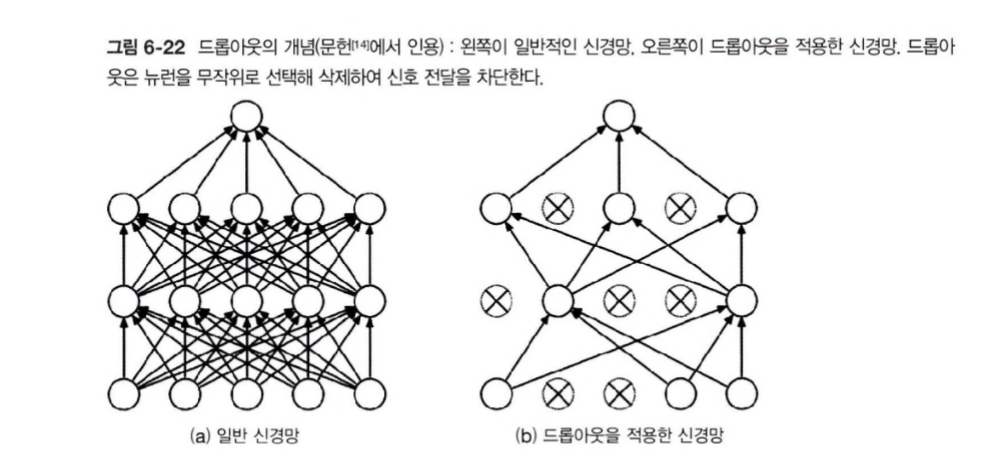

In [15]:
# simple implementation
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        #dropout rate: 제외될 뉴런의 비율
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            # Randomly create array that has same shape with x
            # True when value is bigger than dropout_ratio
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

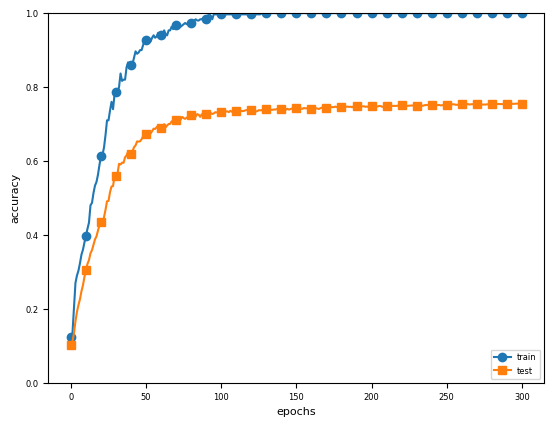

In [19]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
sys.path.append(os.path.abspath("../common"))
from multi_layer_net_extend import MultiLayerNetExtend
from trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = False  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=0)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

드롭아웃을 적용하지 않았을떄

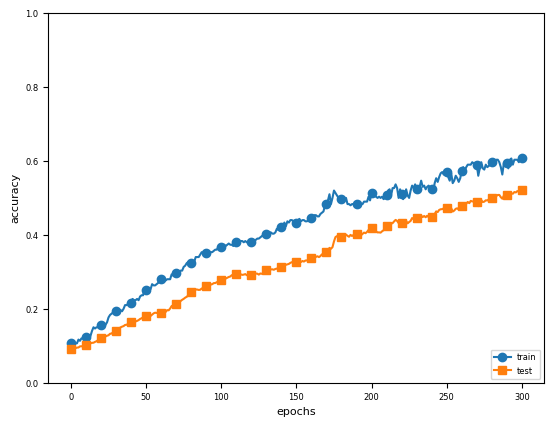

In [18]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
sys.path.append(os.path.abspath("../common"))
from multi_layer_net_extend import MultiLayerNetExtend
from trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=0)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

드롭아웃 적용 이후

# 5. 적절한 하이퍼파라미터 찾기
## 5-1. 검증 데이터
**하이퍼파라미터 성능 평가 시 `test data`를 사용해서는 안 된다!!**

test data를 하이퍼파라미터 성능 평가 시 사용하면 하이퍼파라미터 값이 시험 데이터에 오버피팅된다.  
따라서 하이퍼파라미터 전용 확인 데이터가 필요한데 이를 일반적으로 `검증 데이터(validation data)`라고 한다.   
정리하자면,
- `훈련 데이터`: 매개변수 학습
- `검증 데이터`: 하이퍼파라미터 성능 평가
- `시험 데이터`: 신경망의 범용 성능 평가


MNIST에서는 훈련, 시험 데이터가 있을 뿐 검증 데이터는 없었다.
따라서 이를 만들어줄 필요가 있는데 가장 간단한 방법은 훈련 데이터 중 20% 정도를 검증 데이터로 먼저 분리해주는 것이다.

In [22]:
from util import shuffle_dataset
(x_train, t_train), (x_test, t_test) = load_mnist()
x_train, t_train = shuffle_dataset(x_train, t_train)
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

# 5-2. 하이퍼파라미터 최적화
핵심은 하이퍼파라미터의 `최적 값`이 존재하는 범위를 조금씩 줄여나간다는 것이다.   
과정은: 
- 하이퍼파라미터의 대략적 범위 설정
- 무작위로 하이퍼파라미터 샘플링
- 정확도 평가(작은 에폭)
- 무작위 추출과 학습 반복, 하이퍼파라미터 범위 좁히기

범위 설정은 비교적 큰 편으로 이루어진다.   
0.001~ 1,000과 같이 `10의 거듭제곱`단위에서 대략적으로 책정되는데,   
이를 `로그 스케일(log scale)` 지정이라고 부른다.

위의 하이퍼파라미터 최적화 방법은 이론적이라기보다 다분히 수행자의 경험에 의존한다.   
이러한 방법만 사용 가능한 것은 아니고 `베이즈 최적화`를 통해 수학적 이론에 의한 최적화가 가능하다.

### 베이즈 최적화(Bayesian Optimization)
위에서 썼던 방법을 `Random Search`라고 할 수 있겠다.   
샘플링->평가 과정을 반복하면서, 이전의 성능 결과에 대한 지식이 반영되어있다고 보기 어렵다. 따라서 최적의 탐색 횟수라고 하기는 어렵다.   

`Basyesian Optimization`은 입력값 x를 받는 미지의 목적 함수 $f(x)$를 상정하고 해당 함숫값 $f(x)$를 최대화하는 최적 해를 찾는다. 따라서 과정은:
- 목적 함수와 하이퍼파라미터 쌍을 대상으로 Surrogate Model(대체 모델)을 만들고
- 순차적으로 하이퍼파라미터를 업데이트하여 평가를 통해 최적의 하이퍼파라미터 조합을 탐색한다.

용어를 정리하자면 베이지안 최적화에서
- `Surrogate Model`: 기존 입력값들을 바탕으로 목적 함수의 형태에 대한 확률적인 추정을 하는 모델. 이로 인해 모델 내에서 사전 정보를 학습하고 자동적으로 업데이트가 가능하다. 주로 가우시안 프로세스를 통해 만들어진다.
- `Acquisition Function`: `Surrogate Model`이 목적 함수에 대해 확률적으로 추정한 결과를 바탕으로 다음 번에 탐색할 입력값 후보를 추천하는 함수

위의 모델과 함수를 이용해 이루어진다. 이것이 언제나 효율적인 것은 아니고 언제나 그러하였듯 적절한 하이퍼파라미터와 데이터 하에서 성능이 좋은 것.   

## 5-3. 하이퍼파라미터 최적화 구현

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.76) | lr:0.008811627411457326, weight decay:4.230964729369228e-08
Best-2(val acc:0.73) | lr:0.00932363702461096, weight decay:5.672259748686242e-07
Best-3(val acc:0.71) | lr:0.00784722176227306, weight decay:4.435384716151752e-05
Best-4(val acc:0.71) | lr:0.006658698264627084, weight decay:4.4022678422257485e-08
Best-5(val acc:0.7) | lr:0.0062794871130717935, weight decay:4.4686437234820126e-05
Best-6(val acc:0.69) | lr:0.007754308209530296, weight decay:7.556449856155915e-05
Best-7(val acc:0.67) | lr:0.005760304267753587, weight decay:4.300426625481814e-05
Best-8(val acc:0.66) | lr:0.006041987017029216, weight decay:4.109929709387914e-05
Best-9(val acc:0.66) | lr:0.00613888033972398, weight decay:1.4843741340473952e-06
Best-10(val acc:0.65) | lr:0.005256917173099361, weight decay:1.056685607325279e-07
Best-11(val acc:0.61) | lr:0.004126870634945064, weight decay:1.2399997471364303e-05
Best-12(val acc:0.61) | 

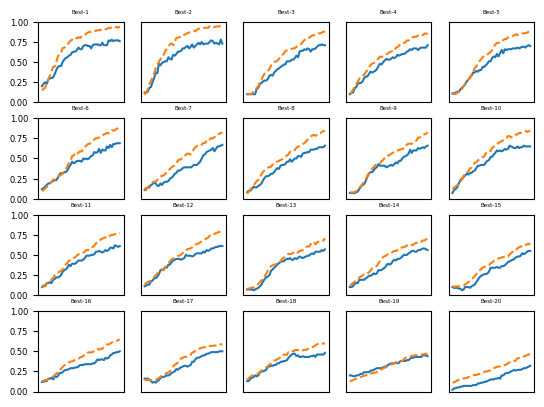

In [24]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
sys.path.append(os.path.abspath("../common"))
from multi_layer_net import MultiLayerNet
from util import shuffle_dataset
from trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    #print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()